In [354]:
# Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# # Supress Warnings

import warnings 
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [308]:
# Read the data

bike_sharing = pd.read_csv("day.csv")

In [309]:
# Look at the first five rows

bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [310]:
bike_sharing.shape

(730, 16)

In [311]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [312]:
# Check the summary of statistics

bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [313]:
# Check for the Null values

bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [314]:
## There are no missing values in the data set

# Check the unique values for each column

bike_sharing.nunique()


instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [315]:
# Drop Columns instant and dteday. instant is kind of s.no for each each row. 
## dteday is date which can be identified using other variable for example yr, mnth,weekday

bike_sharing.drop(['instant','dteday'],axis=1,inplace=True)

In [316]:
##check the table again after removing 2 variables

bike_sharing.shape

(730, 14)

In [317]:
# Casual & Registered columns sum up to  cnt column . so these columns can be deleted.

bike_sharing.drop(['casual','registered'],axis=1,inplace=True)

In [318]:
bike_sharing.shape

(730, 12)

In [319]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [320]:
## Map the season data as per the data dictionary

bike_sharing.season = bike_sharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [321]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [322]:
## Similarly map the vaules for wethersit column

bike_sharing.weathersit = bike_sharing.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [323]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [324]:
# Create dummy variables for season as season has 4 types of valuses

seasons_new = pd.get_dummies(bike_sharing['season'])

In [325]:
seasons_new.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [326]:
# We don't need 4 columns as the season can be identifies by 3 cloumns

# let's drop the first column from dummies 

seasons_new = pd.get_dummies(bike_sharing['season'], drop_first = True)

In [327]:
seasons_new.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [328]:
# Add the results to original bike_sharing data

bike_sharing = pd.concat([bike_sharing,seasons_new], axis = 1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [329]:
# Drop column Season as we have created the dummies for it

bike_sharing.drop(['season'],axis=1,inplace=True)

In [330]:
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [331]:
bike_sharing.shape

(730, 14)

In [332]:
## Similarly create Dummy varibales for weathersit

weathersit_new = pd.get_dummies(bike_sharing['weathersit'], drop_first = True)
weathersit_new.head()

,Light_snowrain,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [333]:
# Add the results to original bike_sharing data

bike_sharing = pd.concat([bike_sharing,weathersit_new], axis = 1)
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light_snowrain,Misty
0,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [334]:
bike_sharing.shape

(730, 16)

In [335]:
# Drop column Weathersit as we have created the dummies for it

bike_sharing.drop(['weathersit'],axis=1,inplace=True)

In [336]:
bike_sharing.shape
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light_snowrain,Misty
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [337]:
bike_sharing.shape

(730, 15)

In [338]:
# Map the values of weekday and Months

bike_sharing.mnth = bike_sharing.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

In [339]:
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light_snowrain,Misty
0,0,Jan,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,Jan,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,Jan,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,Jan,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,Jan,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [340]:
# We don't need 12 columns as the season can be identifies by 11 cloumns

# let's drop the first column from dummies 

mnth_new = pd.get_dummies(bike_sharing['mnth'], drop_first = True)

In [341]:
mnth_new.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [342]:
# Add the results to original bike_sharing data

bike_sharing = pd.concat([bike_sharing,mnth_new], axis = 1)
bike_sharing.head()

# Drop mnth column 

bike_sharing.drop(['mnth'],axis=1,inplace=True)

In [343]:
bike_sharing.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [344]:
bike_sharing.shape

(730, 25)

In [345]:
## Removing the weekday column . 

bike_sharing.drop(['weekday'],axis=1,inplace=True)

In [346]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [347]:
# Splitting the data into training and testing set

bike_sharing_train, bike_sharing_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [348]:
# Rescaling the features

# Apply scaler() to all the columns except the '1-0' and 'dummy' variables

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_sharing_train[num_vars] = scaler.fit_transform(bike_sharing_train[num_vars])

bike_sharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


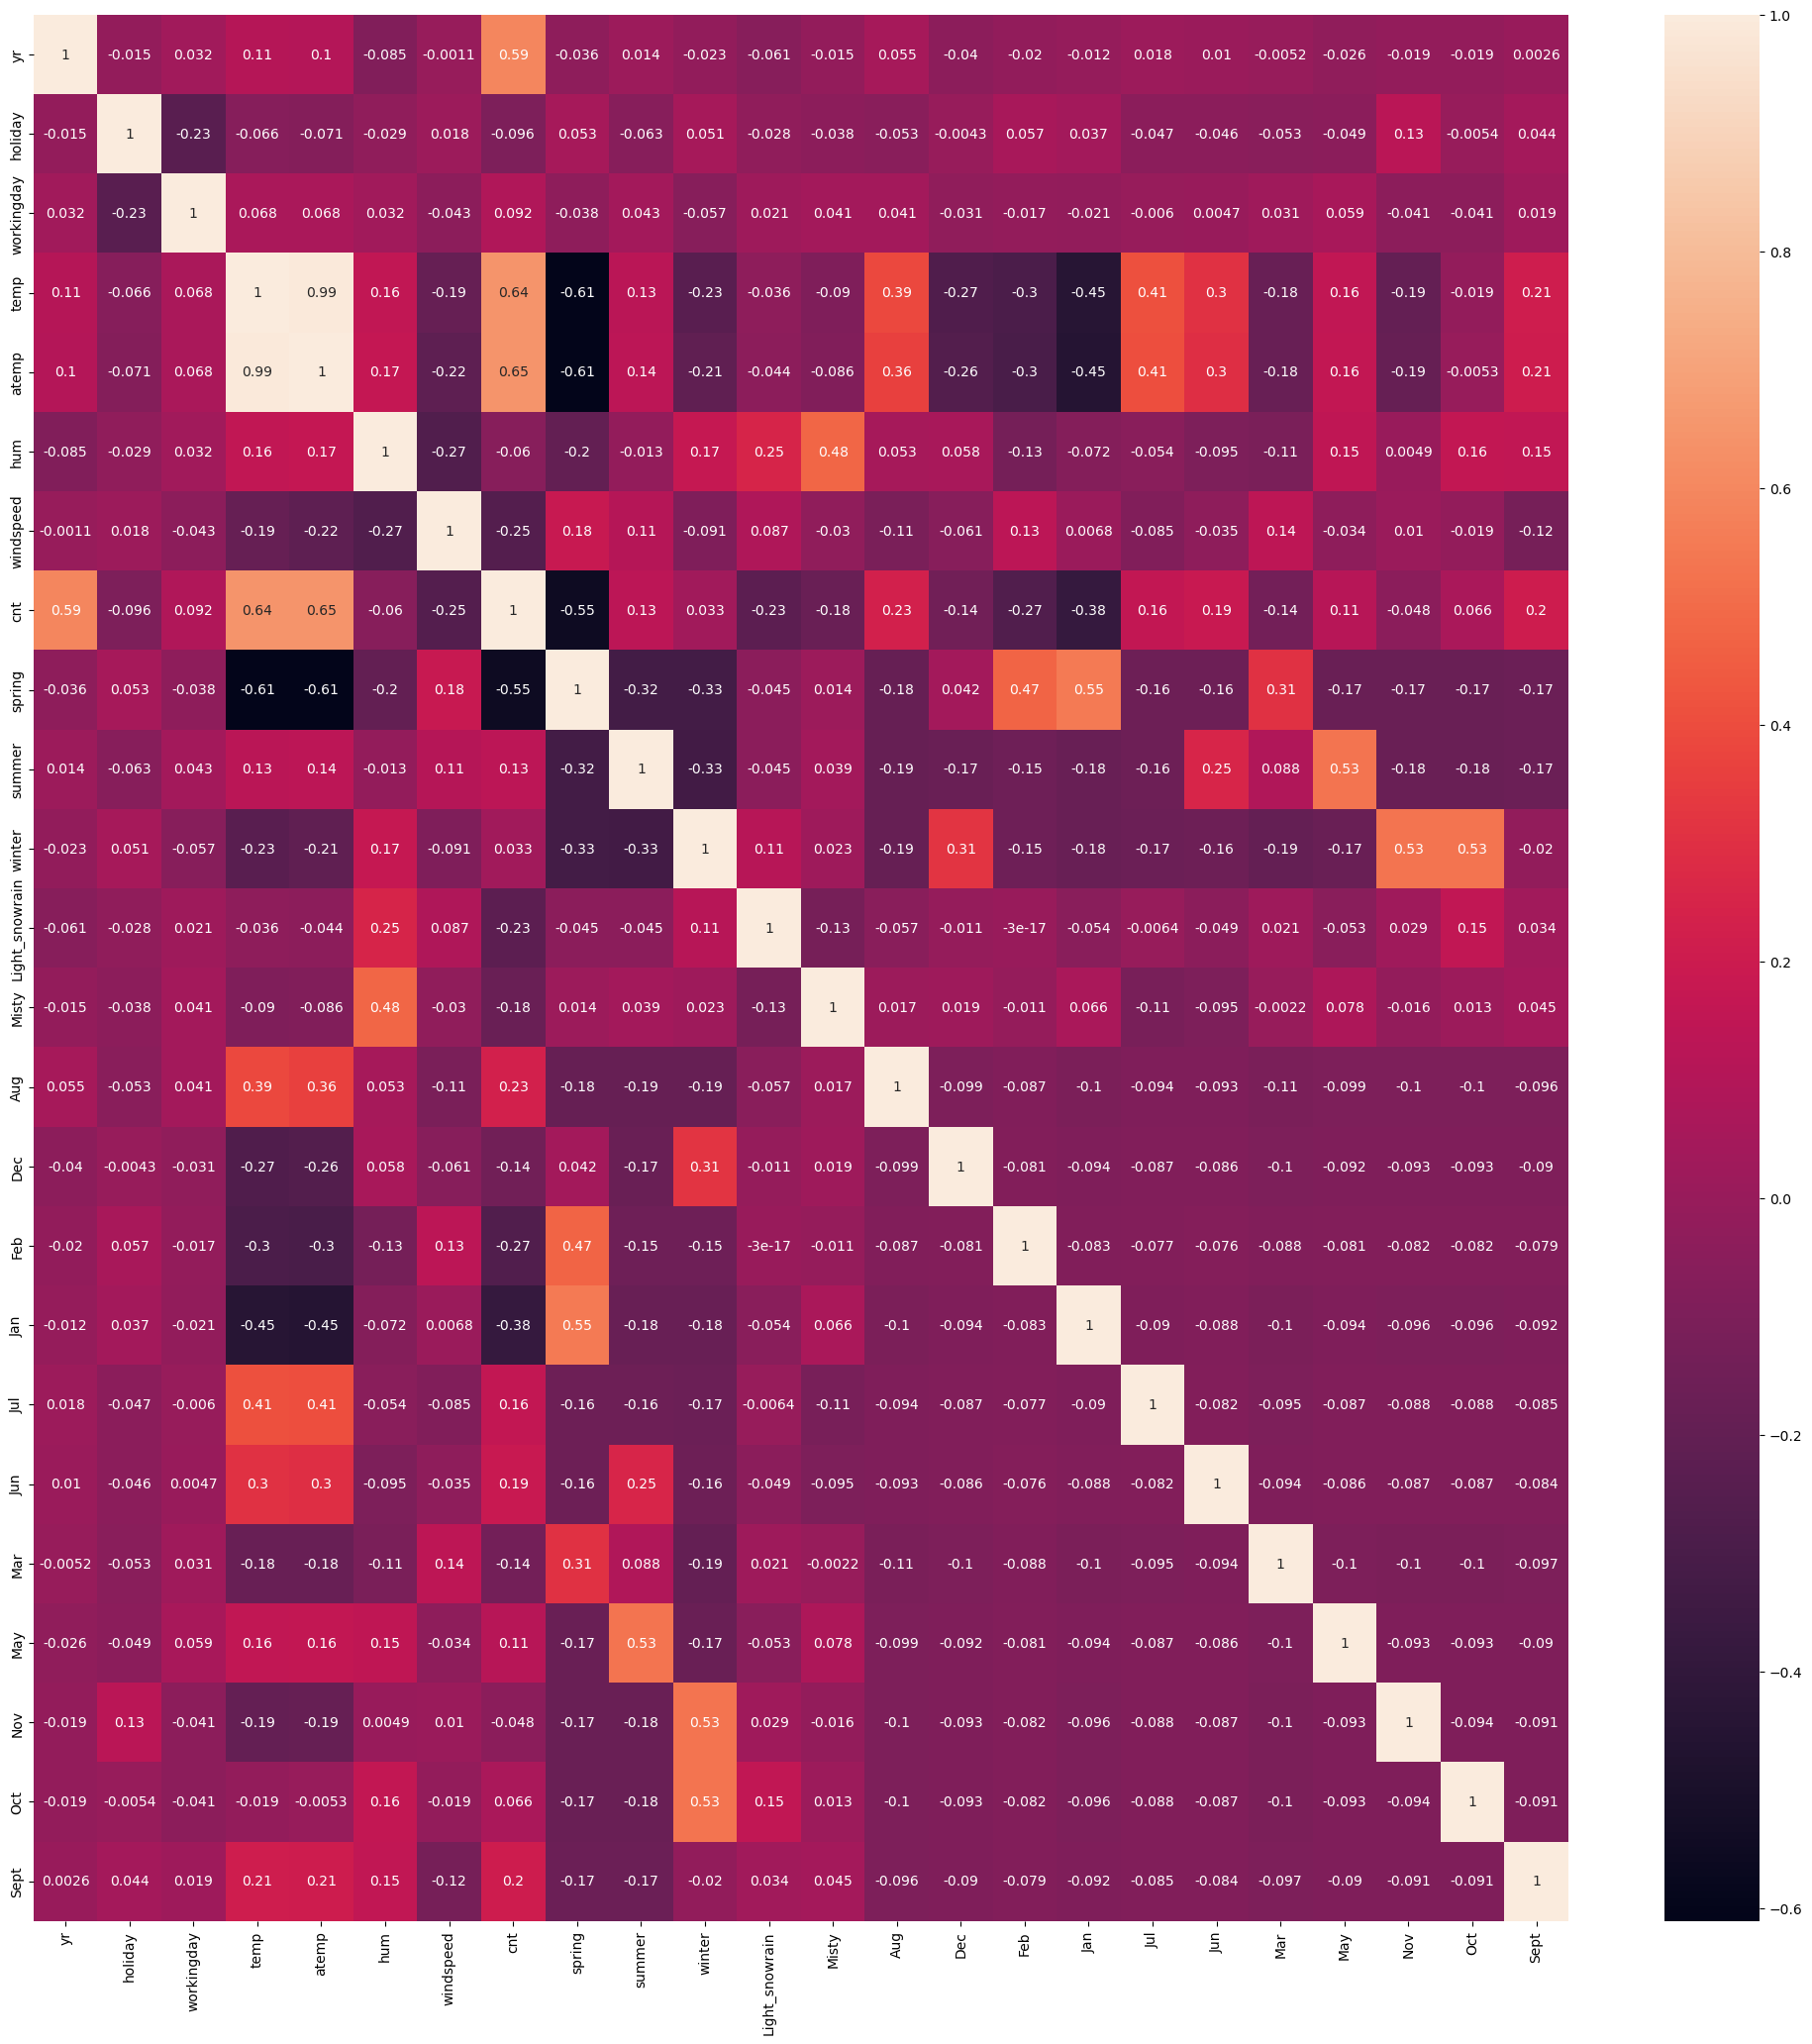

In [349]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(bike_sharing_train.corr(), annot = True)
plt.show()

In [350]:
# Many variables are highly correlated

# Dividing into X and Y sets for the model building

y_train = bike_sharing_train.pop('cnt')

X_train = bike_sharing_train

In [356]:
# Building the model

# Importing RFE and LinearRegression top lines

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select = 15) 
rfe = rfe.fit(X_train, y_train)

In [357]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 8),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sept', True, 1)]

In [359]:
# Removing the variables which have high RFE values like ' workingday' , 'atemp', 'Aug' , 'Jun', 'Mar' , 'May', 'Oct'

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light_snowrain', 'Misty', 'Dec', 'Jan', 'Jul', 'Nov',
       'Sept'],
      dtype='object')

In [360]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct'], dtype='object')

In [361]:
# Building model using statsmodel, for the detailed statistics
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [362]:
# Adding a constant variable

X_train_rfe = sm.add_constant(X_train_rfe)

In [363]:
 # Running the linear model

lm = sm.OLS(y_train,X_train_rfe).fit()

In [364]:
# Check the Summary of Linear Model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          3.34e-189
Time:                        08:53:13   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3202      0.036      8.

In [368]:
# Dec & Nov variables can be dropped but will not drop now and check for VIFs

# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
9,Misty,2.32
0,yr,2.09
13,Nov,1.83
11,Jan,1.75


In [369]:
# VIF of temhum is very high dropping this variable

# Drop the humidity variable 

X_train_new = X_train_new.drop(['hum'], axis = 1)

# Build the new model lm2

X_train_new = sm.add_constant(X_train_new)

lm2 = sm.OLS(y_train,X_train_new).fit()


In [370]:
# Check the Summary of Linear Model

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          1.57e-186
Time:                        09:06:53   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2466      0.032      7.

In [371]:

# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
12,Nov,1.80
10,Jan,1.66
11,Jul,1.59
8,Misty,1.56


In [372]:
# VIF of temp is higher than 5 dropping this variable as well

X_train_new = X_train_new.drop(['temp'], axis = 1)

In [374]:
# Build the new model lm3

X_train_new = sm.add_constant(X_train_new)

lm3 = sm.OLS(y_train,X_train_new).fit()

In [375]:
# Check the Summary of Linear Model

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          5.50e-160
Time:                        09:10:45   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5961      0.016     37.

In [376]:
# P value of winter and Jul are significantly Higher

# Calculating the VIFs

X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.88
3,spring,2.89
5,winter,2.84
4,summer,2.01
0,yr,1.83
11,Nov,1.79
9,Jan,1.64
7,Misty,1.52
8,Dec,1.45
10,Jul,1.20


In [378]:
# All the VIF's are less than 5 now.

# Residual Analysis of the train data

X_train_lm = sm.add_constant(X_train_new)

y_train_cnt = lm3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

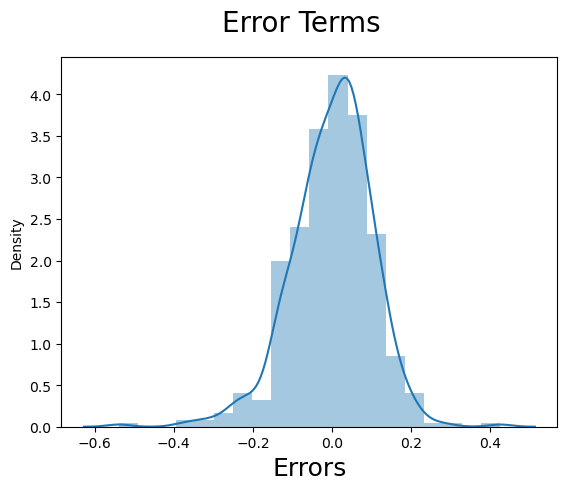

In [379]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [383]:
# Making Predictions 

# Applying the scaling on the test sets

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_sharing_test[num_vars] = scaler.transform(bike_sharing_test[num_vars])

bike_sharing_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,0,0,0


In [384]:
# Dividing into X_test and y_test

y_test = bike_sharing_test.pop('cnt')
X_test = bike_sharing_test

In [385]:
# Creating X_test_new dataframe by dropping variables from X_test


X_test_new = X_test.drop(['hum', 'temp', ], axis = 1)

In [386]:
X_test_new.head()

,yr,holiday,workingday,atemp,windspeed,spring,summer,winter,Light_snowrain,Misty,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
184,0,1,0,0.769660,0.084219,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.842587,0.153728,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496145,0.334206,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.795343,0.339570,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.741471,0.537414,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [387]:
X_train_new.head()

,yr,holiday,windspeed,spring,summer,winter,Light_snowrain,Misty,Dec,Jan,Jul,Nov,Sept
653,1,0,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.255342,1,0,0,0,1,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.188475,0,1,0,0,1,0,0,0,0,0


In [388]:
col1 = X_train_new.columns

In [389]:
X_test_new = X_test_new [col1]

In [390]:
# Add constant to test data

X_test_lm3 = sm.add_constant(X_test_new)

In [391]:
y_pred = lm3.predict(X_test_lm3)

In [392]:
# calculate R2 Score

r2 = r2_score(y_test, y_pred)

In [393]:
print(r2)

0.7764329747476505


Text(0, 0.5, 'y_pred')

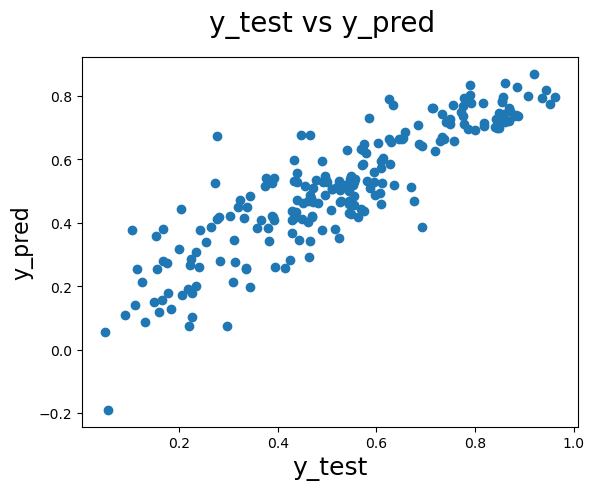

In [394]:
# Model Evaluation

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
# Training data R2 - 0.793

# Test Data R2  - 0.776

# Conclusion Demands of bike depends on following variables

windspeed
spring
winter
summer
yr
Nov
Jan
Misty
Dec
Jul
Sept
Light_snowrain
holiday